# Analiza podatkov 1000 najbolših kolesarjev vseh časov
Za začetek programa odprite main.py in v ustrezen prostor vpišite datum (datum = "..........") oblike XXXX-XX-XX, npr. 2024-08-05 (torej izgleda kot datum = "2024-08-05"), potem pa pritisnite gumb za pogon programa (zgoraj desno, izgleda kot standardni gumb "play").
To lahko traja kar nekaj časa :>.

Za projektno nalogo pri predmetu Uvod v programiranje bom analiziral rezultate in lastnosti janbolših kolesarjev vseh časov, za le te pa ponavadi velja ravno prvih tisoč kolesarjev. Podatke in range kolesarjev sem dobil s spletne strani https://www.procyclingstats.com/. Obenem bom uporabil njihov način rangiranja kolesarjev v alltime rankingu, tukaj kot t_alltime (seštevek vseh PCS točk kolesarja deljen z 10; npr. GC zmaga na Tour de France prinese 500 PCS točk, torej 50 v alltime rankingu). V kolesarjenju lahko tekmovalci dobijo točke na različne načine:

- Visoke uvrstitve na večdnevnih dirkah (npr. top 50 na grand tourih, top 25 na enotedenskih dirkah(?), ...)
- Visoke uvrstitve na etapah večdnevnih dirk (npr. top 25 na etapi grand tourov, ..., kronometerske etape, ...)
- Zmage na enodnevnih dirkah (največ prinesejo klasike, med njimi največ spomeniki, obstajajo tudi manj vredne enodnevne dirke, ..., enodnevni kronometri, ...)

Število dobljenih točk je tudi odvisno od ranga same dirke; najvišji je WT ali World Tour, potem sta 1.Pro in 2.Pro, nato 1.1 ter 2.2 in še na koncu NAT. Število točk znotraj ranga dirk je tudi odvisna od pomembnosti samih dirk; od enodnevnih spomeniki prinesejo največ točk, od treh grand tourov ali tritedenskih dirk (Tour de France, Giro d'Italia, Vuelta a Espana) prinese največ točk Tour, potem Giro in šele potem Vuelta. WT enotedenske so med sabo enakovredne.

Pojasnila terminologije:
- GC ali General Classification(ANG) ali Classification Générale(FRA); zmagovalec skupne razvrstitve je tisti, ki kumulativno zbere najmanj časa čez vse etape večdnevnih dirk (npr. Tour de France), to je najpomembnejša uvrstitev med štirimi na vsaki dirki (ostale so malo brezvezne po mojem mnenju)
- t_...; točke, ki jih kolesar zbere glede na kategorijo (etape so lahko klasificirane kot šprinterske, gorske, hribovske ali kronometer(TT), posebej so dane tudi enodnevne, zato bodo točke zbrane na le teh šle k skupnim t_...)
- zac.; začetki

Države so v angleščini.

(Disclaimer: niso vse enotedenske dirke dolge en teden; na primer ena izmed najpomembnejših Criterium du Dauphine ima 8 etap (torej 8 dni), dirka po Portugalski ima 10, dirka po Sloveniji ima 5, itd., ampak večina enotedenskih dirk ima 7 dni in 7 etap, včasih tudi 7 dni in 8 etap)

Vredno omembe je tudi to, da se v 21.st nahajamo v dobi specializacije, kar se tiče tipa kolesarja. To je posledica povišanega nivoja treninga, kjer so na primer tisti, ki trenirajo ekskluzivno za šprint sedaj veliko boljši v šprintu do nešprinterju, zato dandanes ne vidiš, da bi "šprinterske" etape zmagal katerikoli nešprinter. Obstajajo tudi "čisti" šprinterji (ANG: pure sprinters), ki so dobri v šprintu in zgolj v šprintu. Obstajajo tudi npr. "čisti" hribolazci, ki so slabi v kronometru (po navadi so hribolazci tudi dobri v kronometru, saj trenirajo v maksimiziranju moči glede na maso ter trenirajo v dolgih naporih). Dandanes redko najdemo tako imenovane "generaliste", dva omembe vredna sta ravno Tadej Pogačar in Wout van Aert.

Poglejmo si sedaj podatke, kot veljajo 2024-08-05.

In [2]:
import pandas
from IPython.display import display

pandas.set_option("display.max_columns", 25)
pandas.set_option("display.max_rows", 50)
%matplotlib inline
kolesarji =  pandas.read_csv("Tabela/kolesarji.csv", index_col="rang")

FileNotFoundError: [Errno 2] No such file or directory: 'Tabela/kolesarji.csv'

Oglejmo si zbrane podatke in sicer prvih 30 kolesarjev vseh časov:

In [188]:

kolesarji.head(30)

,ime,drzava,t_alltime,sezone,t_enodnevne,t_GC,t_kronometer,t_sprint,t_gore,t_hribi,...,etapne,GC,enodnevne,kronometer,grand tour zac.,grand tour zmage,spomeniki zac.,spomeniki zmage,enotedenske,sezonsko povprečje
rang,,,,,,,,,,,,,,,,,,,,,
1,Eddy Merckx,Belgium,3851.0,14,21379,13710,12924,18190,6054,1456,...,152,45,79,67,16,10,51,15,35,275.1
2,Sean Kelly,Ireland,2157.3,19,13100,10608,7658,19046,5556,4731,...,111,24,24,26,21,1,55,9,23,113.5
3,Francesco Moser,Italy,2125.5,17,17712,7930,8566,14520,1850,212,...,61,16,69,40,15,1,47,6,15,125.0
4,Bernard Hinault,France,2014.6,13,6381,10499,11458,6812,3739,1443,...,87,29,30,50,13,10,19,4,19,155.0
5,Roger De Vlaeminck,Belgium,1998.3,16,19188,4118,3984,18977,1612,450,...,92,11,58,10,13,0,50,10,11,124.9
6,Alejandro Valverde,Spain,1910.1,21,13381,13654,4916,3740,15228,7432,...,75,25,33,8,32,1,35,4,24,91.0
7,Jacques Anquetil,France,1837.9,17,5436,9897,9378,5962,2518,638,...,48,24,49,63,16,8,24,0,16,108.1
8,Rik Van Looy,Belgium,1713.6,18,14335,3476,1180,15847,1246,1264,...,100,9,52,0,18,0,45,7,9,95.2
9,Laurent Jalabert,France,1609.2,15,7874,8411,7217,10656,4218,3568,...,96,21,22,14,21,1,31,2,20,107.3


Če si pogledamo zgolj alltime točke ter zmage takoj izstopa en kolesar na prvem mestu, ki ima skoraj dvakrat več točk kot drugo mesto in tudi čez 100 zmag več. Opazimo lahko tudi, da sta med prvimi tridesetimi kolesarji dva slovenca in sicer Tadej Pogačar na 19. mestu in Primož Rogljič na 27.

In [189]:
kolesarji[["ime", "t_alltime", "zmage"]].head(30)

,ime,t_alltime,zmage
rang,,,
1,Eddy Merckx,3851.0,276
2,Sean Kelly,2157.3,159
3,Francesco Moser,2125.5,146
4,Bernard Hinault,2014.6,146
5,Roger De Vlaeminck,1998.3,161
6,Alejandro Valverde,1910.1,133
7,Jacques Anquetil,1837.9,121
8,Rik Van Looy,1713.6,161
9,Laurent Jalabert,1609.2,139


Vidimo iz tabele, da legendarni belgijec Eddy Merckx velja za najboljšega kolesarja vseh časov, kar velja tudi kot splošno mnenje že od konca njegove zadnje sezone. Najbljižji mu je irski Sean Kelly, trenutni komentator na Eurosportu za kolesarstvo, ki velja za najboljšega enotedenskega kolesarja vseh časov, ne nujno zaradi števila zmag, ampak zaradi števila zmag najpomembnejših enotedenskih. Poglejmo si podatke:

In [163]:
kolesarji["enotedenske"] = kolesarji["GC"] - kolesarji["grand tour zmage"]
enotedenske_zmage = kolesarji[["ime", "enotedenske"]]
enotedenske_zmage.sort_values("enotedenske", ascending=False).head(10)

,ime,enotedenske
rang,,
1,Eddy Merckx,35
6,Alejandro Valverde,24
2,Sean Kelly,23
9,Laurent Jalabert,20
22,Miguel Indurain,19
4,Bernard Hinault,19
70,Nairo Quintana,18
27,Primož Roglič,17
56,Stephen Roche,16


Eddy Merckx je, kot vedno, na prvem mestu, ampak je vredno omeniti, da je veliko teh zmag iz manj pomembnih belgijskih enotedenskih dirk, enako velja za španca na drugem mestu, ki je rad šel na nepomembne španske enotedenske dirke. Opazimo tudi, da je zelo blizu, na 8. mestu, tudi Rogljič, ki, zaradi podobnega argumenta kot pri Kelly-ju, velja za 2. najboljšega enotedenskega kolesarja vseh časov, čeprav se njegova kariera še ni zaključila. Vredno je omeniti, da ima Rogljič eno manj zmago v enotedenskih dirkah ranga World Tour (najvišjega ranga) kot Sean Kelly, kar se iz zbranih podatkov ne more videti. Lahko si pa pogledamo najboljše kolesarje v različnih kategorijah glede na dobljene PCS točke specifičnih etap ali enodnevnih dirk (kot je razloženo zgoraj):

In [164]:

display(kolesarji[["ime", "t_enodnevne"]].sort_values("t_enodnevne", ascending=False).head(20))
display(kolesarji[["ime", "t_GC"]].sort_values("t_GC", ascending=False).head(20))
display(kolesarji[["ime", "t_kronometer"]].sort_values("t_kronometer", ascending=False).head(20))
display(kolesarji[["ime", "t_sprint"]].sort_values("t_sprint", ascending=False).head(20))
display(kolesarji[["ime", "t_gore"]].sort_values("t_gore", ascending=False).head(20))
display(kolesarji[["ime", "t_hribi"]].sort_values("t_hribi", ascending=False).head(20))

,ime,t_enodnevne
rang,,
1,Eddy Merckx,21379
5,Roger De Vlaeminck,19188
3,Francesco Moser,17712
29,Davide Rebellin,15521
8,Rik Van Looy,14335
6,Alejandro Valverde,13381
58,Frans Verbeeck,13321
39,Johan Museeuw,13115
2,Sean Kelly,13100


,ime,t_GC
rang,,
15,Joop Zoetemelk,13975
1,Eddy Merckx,13710
6,Alejandro Valverde,13654
20,Raymond Poulidor,12493
31,Alberto Contador,11393
2,Sean Kelly,10608
4,Bernard Hinault,10499
7,Jacques Anquetil,9897
37,Vincenzo Nibali,9868


,ime,t_kronometer
rang,,
1,Eddy Merckx,12924
33,Fabian Cancellara,12014
15,Joop Zoetemelk,11920
4,Bernard Hinault,11458
18,Tony Rominger,11055
22,Miguel Indurain,10935
20,Raymond Poulidor,10869
84,Tony Martin,10664
47,Alex Zülle,10397


,ime,t_sprint
rang,,
16,Erik Zabel,19419
2,Sean Kelly,19046
5,Roger De Vlaeminck,18977
1,Eddy Merckx,18190
8,Rik Van Looy,15847
3,Francesco Moser,14520
36,André Greipel,14262
46,Domingo Perurena,13578
48,Robbie McEwen,13488


,ime,t_gore
rang,,
6,Alejandro Valverde,15228
37,Vincenzo Nibali,9272
55,Joaquim Rodríguez,9165
31,Alberto Contador,8230
265,Romain Bardet,8139
70,Nairo Quintana,7824
173,Thibaut Pinot,7740
19,Tadej Pogačar,7571
27,Primož Roglič,7366


,ime,t_hribi
rang,,
17,Peter Sagan,8516
6,Alejandro Valverde,7432
116,Michael Matthews,7134
61,Greg Van Avermaet,6010
42,Alexander Kristoff,5141
30,Philippe Gilbert,5131
16,Erik Zabel,5063
2,Sean Kelly,4731
92,Julian Alaphilippe,4510


Kot vidimo velja Eddy Merckx za najboljšega enodnevnega kolesarja ter kronometrista vseh časov, 2. najboljšega GC kolesarja vseh časov, 4. najboljšega šprinterja vseh časov in 20. najboljšega hribolazca vseh časov. Omembe vreden je tudi Mark Cavendish, 11. na tabeli za t_sprint, ki zaradi največjega števila šprinterskih zmag ter zmag na dirki po Franciji (35) velja za najboljšega "čistega" šprinterja vseh časov (glej del o specializiranosti tipa kolesarjev v uvodu). Na tabeli za t_gore, torej za hribolazce, lahko vidimo tudi naša dva velikana Primoža Rogljiča in Tadeja Pogačarja, ki eden zraven drugega stojita na 8. in 9. mestu, torej za 10 mest pred Merckxom. Pogačarja vidimo tudi na tabeli za t_hills, torej za manjše hribe, na 19. mestu. Poglejmo si sedaj zgolj Pogačarja ter legendarnega Belgijca, saj trenutno (poletje 2024) Pogačar velja za edinega kolesarja, ki bi lahko presegel Eddyja Merckxa:

In [165]:
display(kolesarji[kolesarji["drzava"] == "Belgium"].head(1))
display(kolesarji[kolesarji["drzava"] == "Slovenia"].head(1))


,ime,drzava,t_alltime,sezone,t_enodnevne,t_GC,t_kronometer,t_sprint,t_gore,t_hribi,zmage,etapne,GC,enodnevne,kronometer,grand tour zac.,grand tour zmage,spomeniki zac.,spomeniki zmage,enotedenske
rang,,,,,,,,,,,,,,,,,,,,
1,Eddy Merckx,Belgium,3851.0,14,21379,13710,12924,18190,6054,1456,276,152,45,79,67,16,10,51,15,35


,ime,drzava,t_alltime,sezone,t_enodnevne,t_GC,t_kronometer,t_sprint,t_gore,t_hribi,zmage,etapne,GC,enodnevne,kronometer,grand tour zac.,grand tour zmage,spomeniki zac.,spomeniki zmage,enotedenske
rang,,,,,,,,,,,,,,,,,,,,
19,Tadej Pogačar,Slovenia,1303.8,8,5140,6344,2533,227,7571,3198,84,51,16,17,7,7,4,14,6,12


Kot vidimo se mu počasi približuje tako v zmagah na grand tourih, kot v zmagah na spomenikih. Poglejmo sedaj, koliko točk je do sedaj vsak od njiju zbral v povprečju na sezono:

In [193]:
kolesarji["sezonsko povprečje"] = round(kolesarji["t_alltime"] / kolesarji["sezone"], 1)
kolesarji.head(1)
sezonsko_povprecje = kolesarji[["ime", "sezonsko povprečje"]]
sezonsko_povprecje.sort_values("sezonsko povprečje", ascending=False).head(20)


,ime,sezonsko povprečje
rang,,
1,Eddy Merckx,275.1
19,Tadej Pogačar,163.0
4,Bernard Hinault,155.0
54,Remco Evenepoel,135.6
3,Francesco Moser,125.0
5,Roger De Vlaeminck,124.9
13,Freddy Maertens,123.4
2,Sean Kelly,113.5
12,Giuseppe Saronni,109.3


Kot vidimo je Merckx daleč pred vsemi in ravno na drugem mestu je Pogačar. Edini, ki je Pogačarju blizu je Bernard Hinault na tretjem mestu, ki je imel kar kratko kariero. Hiter račun pokaže, da bo moral imeti Pogačar še vsaj 16 povprečnih sezon, če bo hotel doseči Merckxa, kar je nerealistično (s tem, da se 2024 sezona trenutno še zdaleč ni končala). Vreden omembe je tudi Remco Evenepoel na 4. mestu, katerega Belgijci radi naznanjajo za naslednika Eddyja Merckxa, čeprav je proti Pogačarju mnogokrat slabši. Poglejmo si sedaj povprečno število točk dobljenih glede na število sezon kolesarja (tukaj se lahko pojavijo napake zaradi še aktivnih kolesarjev, ki 2024 sezone še niso zaključili):

<Axes: xlabel='sezone'>

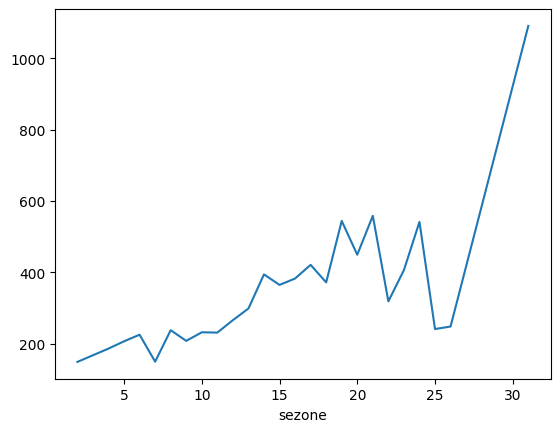

In [168]:
točke_glede_na_sezone = kolesarji.groupby("sezone")["t_alltime"].mean()
točke_glede_na_sezone.plot()

In [198]:
kolesarji.sort_values("sezone", ascending=False).head(3)

,ime,drzava,t_alltime,sezone,t_enodnevne,t_GC,t_kronometer,t_sprint,t_gore,t_hribi,...,etapne,GC,enodnevne,kronometer,grand tour zac.,grand tour zmage,spomeniki zac.,spomeniki zmage,enotedenske,sezonsko povprečje
rang,,,,,,,,,,,,,,,,,,,,,
29,Davide Rebellin,Italy,1090.3,31,15521,7575,2195,9330,4204,1641,...,23,8,31,3,19,0,46,0,8,35.2
432,Francisco Mancebo,Spain,248.3,26,1768,5836,1915,2568,3197,910,...,8,4,4,0,12,0,13,0,4,9.6
450,Óscar Sevilla,Spain,241.2,25,779,5240,2442,2454,2244,1076,...,8,6,3,0,13,0,5,0,6,9.6


Kot vidimo število točk glede na število sezon pretežno raste, s tem da se pri 30 sezonah pojavi anomalija, katere vzrok je Davide Rebellin, ki je imel celih 31 sezon in je vse skupaj zbral 1090.3 točk. Poglejmo si sedaj še število točk glede na državo:

<Axes: ylabel='t_alltime'>

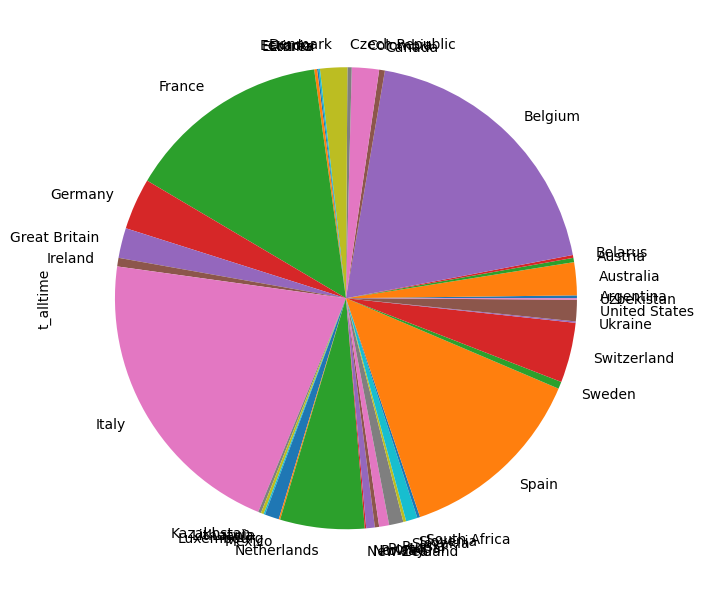

In [176]:
točke_glede_na_drzavo = kolesarji.groupby("drzava")["t_alltime"]
točke_glede_na_drzavo.size().plot(kind='pie', figsize=(7.5, 7.5), fontsize=10)

Opazimo, da so 4 države krepko vodilne v svetu kolesarstva: Italija, Španija, Francija in Belgija, kar je tudi smiselno, saj so najbolj pomembne enodnevne dirke in tudi spomeniki ravno v Belgiji, Italiji ter Franciji in grand touri v Italiji, Franciji in Španiji.

In [186]:
točke_glede_na_drzavo.sum().sort_values(ascending=False).head(24)

drzava
Italy             71313.8
Belgium           61293.9
France            43265.8
Spain             39750.8
Netherlands       19144.8
Switzerland       13207.6
Germany           12766.6
Australia          7701.5
Great Britain      7495.2
Denmark            4790.7
Colombia           4480.2
United States      4332.2
Ireland            4290.3
Slovenia           3541.5
Luxembourg         3255.4
Norway             2958.3
Russia             2794.7
Portugal           2011.4
Slovakia           1517.1
Kazakhstan         1048.9
Sweden             1041.5
Poland             1004.1
Czech Republic      923.9
Canada              741.4
Name: t_alltime, dtype: float64

Vidimo, da je res prva Italija, za njo Belgija, nato Francija in Španija. Slovenija tu zavzame močno 14. mesto in vidimo da bi za 400 točk presegli Eddyja Merckxa. če bi vsem slovenskim top 1000 kolesarjem sešteli alltime točke. Za konec si poglejmo še najbolših 10 v "zmagovalnosti" (ANG: winrate) med najbolšimi stotimi kolesarji vseh časov na spomenikih in grand tourih:

In [218]:
kolesarji["zmagovalnost_gt"] = round(kolesarji["grand tour zmage"] / kolesarji["grand tour zac."] * 100, 1) 
kolesarji["zmagovalnost_spo"] = round(kolesarji["spomeniki zmage"] / kolesarji["spomeniki zac."] * 100, 1) 
display(kolesarji[["ime", "zmagovalnost_gt"]].head(100).sort_values("zmagovalnost_gt", ascending=False).head(10))
display(kolesarji[["ime", "zmagovalnost_spo"]].head(100).sort_values("zmagovalnost_spo", ascending=False).head(10))

,ime,zmagovalnost_gt
rang,,
4,Bernard Hinault,76.9
1,Eddy Merckx,62.5
19,Tadej Pogačar,57.1
7,Jacques Anquetil,50.0
21,Alfredo Binda,45.5
11,Fausto Coppi,41.2
31,Alberto Contador,38.9
40,Chris Froome,33.3
22,Miguel Indurain,30.4


,ime,zmagovalnost_spo
rang,,
21,Alfredo Binda,46.2
19,Tadej Pogačar,42.9
54,Remco Evenepoel,40.0
24,Costante Girardengo,37.5
93,Mathieu van der Poel,33.3
11,Fausto Coppi,31.0
1,Eddy Merckx,29.4
68,Moreno Argentin,24.0
10,Gino Bartali,22.6


Opazimo, zakaj se za Pogačarja misli, da je pravi naslednik Eddyja Merckxa; je tako 3. med najbolšimi vseh časov pri zmagovalnosti grand tourov, kot 2. med najbolšimi vseh časov pri zmagovalnosti spomenikov.